# Kaggle Digit Recognizer Competition

https://www.kaggle.com/c/digit-recognizer/overview

Submission notebook by Richard Kaldenhoven

Version 1: February 19, 2021

## 1. Problem Description

The MNIST (Modified National Institute of Standards and Technology) dataset is a collection of 28x28 pixel greyscale images of handwritten digits ranging from 0 to 9. MNIST is commonly used to experiment with machine learning models for computer vision.  

For the purposes of this competition, the data is split into 42000 training images (with digit labels) and 28000 test images (without digit labels) in the form of CSV files provided by Kaggle. The test dataset does not contain digit labels, as it is meant to be fed into a machine learning model which then generates predictions for the class, or digit label, of each image. The accuracy of the machine learning model is then judged by submitting the predictions on the test dataset to Kaggle for scoring.

## 2. Choosing a Measure of Success

The goal of this notebook is to develop a machine learning model that can classify images of digits into the correct categories (0-9) by predicting the digit values with the highest possible accuracy. For this multiclass prediction problem, accuracy (# of correct predictions/total # of samples) is the measure of success that will be used.

## 3. Evaluation Protocol

To start, a model will be developed and evaluated based on a train/test split of the data, as provided by Kaggle.

A Convolutional Neural Network (CNN) will be developed using the Keras deep learning framework.

Additional models can then be developed to improve the accuracy by creating a new validation dataset from the training dataset, which will allow for more experimentation with the network and regularization.

## 4. Data Preparation

As provided, the image data is in the form of tables, where each row corresponds to an individual image, and the columns contain greyscale values for each pixel (0 to 255).

The data preparation steps can are summarized as follows:

1. Load CSV into Pandas dataframes
2. Take values out of dataframes and store in numpy arrays
3. Reshape and normalize data
4. Convert image label values into one-hot encoded vectors

### 4.1 Load CSV into Pandas dataframes

In [1]:
# Load libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_images = pd.read_csv('train.csv')

In [3]:
train_images

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_images = pd.read_csv('test.csv')

In [5]:
test_images

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 4.2 Take values out of dataframes and store in numpy arrays

The data is converted into numpy arrays so it is compatible with Keras, the machine learning framework that will be used. Note that there is no `y_test` variable, as the test dataset does not come with labels.

In [6]:
x_train = train_images.drop('label', axis=1).values
y_train = train_images['label'].values

x_test = test_images.values

### 4.3 Reshape and normalize data

The `x_train` and `x_test` arrays are currently in the form of matrices of dimension (number of samples, number of pixels). 


In [7]:
print('x_train shape: ', x_train.shape)
print('x_test shape: ', x_test.shape)

x_train shape:  (42000, 784)
x_test shape:  (28000, 784)


Before preparing the data for use in a CNN, individual images can be viewed by reshaping to size (42000, 28, 28).

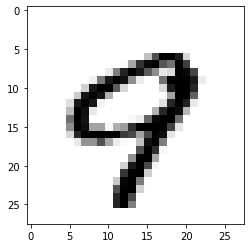

In [8]:
# CODE TO PREVIEW THE TRAINING SET IMAGES

x_train = x_train.reshape((42000, 28, 28))

# Change the index value to view a different image
digit_image = x_train[100]

plt.imshow(digit_image, cmap=plt.cm.binary)

In order to feed into a CNN, the arrays are reshaped into tensors of size (number of samples, image height, image width, number of channels), where the number of channels is equal to 1, since the images are greyscale.

In addition, the array values must also be normalized to help the model converge, which is achieved by dividing each value by the maximum greyscale value, 255.

In [9]:
x_train = x_train.reshape((42000, 28, 28, 1)).astype('float32') / 255

x_test = x_test.reshape((28000, 28, 28, 1)).astype('float32') / 255

In [10]:
print('x_train shape: ', x_train.shape)
print('x_test shape: ', x_test.shape)

x_train shape:  (42000, 28, 28, 1)
x_test shape:  (28000, 28, 28, 1)


### 4.4 Convert image label values into one-hot encoded vectors

Next, the `y_train` array must be converted from label values into one-hot encoded vectors.

In [11]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)

In [12]:
y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [13]:
print('y_train shape: ', y_train.shape)

y_train shape:  (42000, 10)


## 5. Develop a model that does better than a baseline

An attempt at solving this classification problem could be made without doing any machine learning by randomly guessing a digit value from 0 to 9 for each image, which would only result in 10% accuracy. A model based on random guessing sets a low bar for accuracy, and so a baseline CNN model will be developed using Keras to obtain an accuracy to start with.



### 5.1 Network architecture

The baseline CNN will have the following layers:
1. Convolution input layer
2. Max pooling layer
3. Convolution hidden layer
4. Max pooling layer
5. Convolution hidden layer
6. Flattening layer
7. Dense hidden layer
8. Dense output layer

All activations will be ReLu except for the output layer, as this is a multiclass problem, so its activation will be a softmax function. The final layer also must have 10 units, corresponding to the number of classes to predict.

The architecture used here is taken from Chapter 5 of "Deep Learning with Python" by Francois Chollet, Manning, 2018.

In [14]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

Calling the model summary function shows the layers added to the model, their output shapes, and the number of parameters:

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

### 5.2 Training the model

To train the model, it is first compiled using the Adam optimizer, categorical cross-entropy loss function, and the accuracy metric is entered to be evaluated. The model will be trained for 5 epochs (complete passes through the training data) with a batch size of 64 samples (64 samples will be processed at a time).



In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
model.fit(x_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
657/657 [==============================] - 22s 33ms/step - loss: 0.2288 - accuracy: 0.9289
Epoch 2/5
657/657 [==============================] - 23s 35ms/step - loss: 0.0611 - accuracy: 0.9806
Epoch 3/5
657/657 [==============================] - 27s 41ms/step - loss: 0.0425 - accuracy: 0.9860
Epoch 4/5
657/657 [==============================] - 24s 36ms/step - loss: 0.0325 - accuracy: 0.9892
Epoch 5/5
657/657 [==============================] - 23s 35ms/step - loss: 0.0251 - accuracy: 0.9923


The output of the model fit() function displays the fitting progress. Each epoch is displayed along with the loss and accuracy on the training set. With 42000 training samples, and a batch size of 64, there will be 42000/64 = 657 (rounding up to nearest whole number) batches per epoch.

### 5.3 Generating predictions 

Once the model has been trained on the training set, it can be used to make predictions on the test set. Since the CNN has an output layer with 10 units using softmax activation, the predictions will be in the form of a (28000, 10) dimensional array, where each row contains 10 values representing the probablilities for each class (0-9).

In [19]:
predictions = model.predict(x_test)

In [20]:
print('predictions shape:', predictions.shape)

predictions shape: (28000, 10)


To find the class label for each sample, the argmax() function can be used to return the index location for the highest  probability for each sample.

For example, the first sample in the predictions array has a highest probability of 9.9999738e-01, which is corresponds to index position 2, and the class label for the digit '2'.

In [21]:
predictions[0]

array([7.8915208e-10, 7.5004847e-10, 1.0000000e+00, 7.1717055e-09,
       1.6368759e-09, 3.2866446e-11, 2.1808916e-11, 2.6430778e-09,
       1.2680326e-08, 6.2690825e-12], dtype=float32)

In [22]:
predictions[0].argmax()

2

For this competition it is more convenient to have results in the form of an array having 2 columns: one for the sample number, and one for the digit label. The following code converts the predictions array into a more usable form in two steps:

1. Create an empty array named `predictions_converted` with the same shape as the predictions array
2. Use a `for` loop to step through each sample in `predictions`. Overwrite the value in the first column of `predictions_converted` with the sample number, and overwrite the value in the second column of `predictions_converted` with the digit label using the argmax() function.
3. Change the datatype of the `predictions_converted` array to integer.

In [23]:
predictions_converted = np.zeros((predictions.shape[0], 2))

for i in range(0, len(predictions)):
    predictions_converted[i][0] = i+1
    predictions_converted[i][1] = predictions[i].argmax()

In [24]:
predictions_converted = predictions_converted.astype('int')
predictions_converted

array([[    1,     2],
       [    2,     0],
       [    3,     9],
       ...,
       [27998,     3],
       [27999,     9],
       [28000,     2]])

### 5.4 Creating a submission file

In order to submit the prediction results to Kaggle for evaluation, they need to be formatted with the following code:

In [25]:
submission_df = pd.DataFrame(data=predictions_converted, columns=['ImageId', 'Label'])
submission_df.apply(pd.to_numeric)

submission_df

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [26]:
submission_df.to_csv('submission1.csv', index=False)

After submitting the file to Kaggle for evaluation, the accuracy score of the CNN model is 0.98614, or 98.614%.

## 6. Scale up - developing a model that overfits

In order for a model to be accurate it must be designed to have enough parameters to model the problem and be trained long enough to learn from the data, but it is possible that the training process results in a model that overfits. Overfitting means that the model lacks the ability to generalize well enough to predict accurately on a new dataset.

The process of developing a model that has the power to adequately learn from training data and yet still generalize well to new data is broken into two steps:
1. In this section: develop a model that overfits, establishing that it contains enough parameters to model that problem and has been trained long enough. In other words, we know that we have far enough once we have gone to far.
2. In Section 7: implement techniques to reduce overfitting in order to create a model that generalizes

To evaluate whether overfitting is occuring, a new validation data set is created from a portion of the training dataset, and then the model is trained as before on the partial training data.

In [27]:
num_val_samples = 10000

x_val = x_train[:num_val_samples]
y_val = y_train[:num_val_samples]

x_train_partial = x_train[num_val_samples:]
y_train_partial = y_train[num_val_samples:]

In [28]:
model_history = model.fit(x_train_partial, y_train_partial, epochs=5, batch_size=64, validation_data=(x_val,y_val))

Epoch 1/5
500/500 [==============================] - 20s 39ms/step - loss: 0.0226 - accuracy: 0.9928 - val_loss: 0.0162 - val_accuracy: 0.9944
Epoch 2/5
500/500 [==============================] - 20s 40ms/step - loss: 0.0154 - accuracy: 0.9949 - val_loss: 0.0160 - val_accuracy: 0.9939
Epoch 3/5
500/500 [==============================] - 21s 42ms/step - loss: 0.0137 - accuracy: 0.9958 - val_loss: 0.0197 - val_accuracy: 0.9926
Epoch 4/5
500/500 [==============================] - 20s 39ms/step - loss: 0.0126 - accuracy: 0.9961 - val_loss: 0.0239 - val_accuracy: 0.9915
Epoch 5/5
500/500 [==============================] - 20s 41ms/step - loss: 0.0097 - accuracy: 0.9967 - val_loss: 0.0370 - val_accuracy: 0.9904


In [29]:
history_dict = model_history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

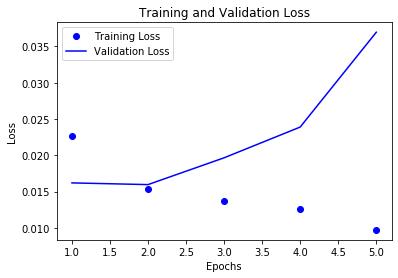

In [30]:
# Training and validation loss plot

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

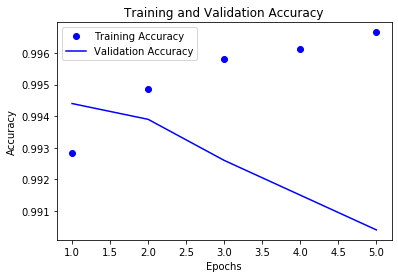

In [31]:
# Training and validation accuracy plot

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

From the plots for the training and validation set loss and accuracy, the baseline model begins to overfit after 2 epochs, when the accuracy on the validation set begins to decrease relative to the training set.

## 7. Adding regularization and tuning hyperparameters

In this section, techniques will be tested to try and reduce overfitting.

### 7.1 Adding Dropout to baseline model

First, a Dropout layer is added prior to the Dense layers.

In [32]:
# New model with Dropout added before Dense layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [33]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
model_history = model.fit(x_train_partial, y_train_partial, epochs=5, batch_size=64, validation_data=(x_val,y_val))

Epoch 1/5
500/500 [==============================] - 22s 44ms/step - loss: 0.3512 - accuracy: 0.8892 - val_loss: 0.0872 - val_accuracy: 0.9726
Epoch 2/5
500/500 [==============================] - 18s 36ms/step - loss: 0.0951 - accuracy: 0.9702 - val_loss: 0.0534 - val_accuracy: 0.9823
Epoch 3/5
500/500 [==============================] - 18s 35ms/step - loss: 0.0720 - accuracy: 0.9770 - val_loss: 0.0464 - val_accuracy: 0.9852
Epoch 4/5
500/500 [==============================] - 18s 36ms/step - loss: 0.0590 - accuracy: 0.9811 - val_loss: 0.0430 - val_accuracy: 0.9860
Epoch 5/5
500/500 [==============================] - 18s 36ms/step - loss: 0.0519 - accuracy: 0.9839 - val_loss: 0.0390 - val_accuracy: 0.9870


In [35]:
history_dict = model_history.history

Creating loss and accuracy plots will be a frequent task, so a function is created to make the plots easier to generate.

In [36]:
def create_val_plot(model_history, plot_type):
    """
    Function to generate loss and accuracy plots for model fitting on training and validation sets.
    Arguments:
    model_history - dictionary of model fitting history
    plot_type - set to either of 'loss' or 'accuracy'
    """
        
    model_history = history_dict
    
    if plot_type == 'loss':
        # Training and validation loss plot

        loss_values = history_dict['loss']
        val_loss_values = history_dict['val_loss']

        epochs = range(1, len(loss_values) + 1)

        plt.plot(epochs, loss_values, 'bo', label='Training Loss')
        plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
        plt.title('Training and Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        
    elif plot_type == 'accuracy':
        # Training and validation accuracy plot

        acc = history_dict['accuracy']
        val_acc = history_dict['val_accuracy']

        epochs = range(1, len(acc) + 1)
        
        plt.plot(epochs, acc, 'bo', label='Training Accuracy')
        plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
        plt.title('Training and Validation Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

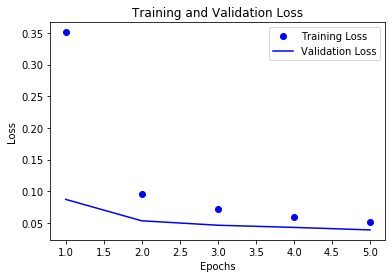

In [37]:
create_val_plot(model_history=history_dict, plot_type='loss')

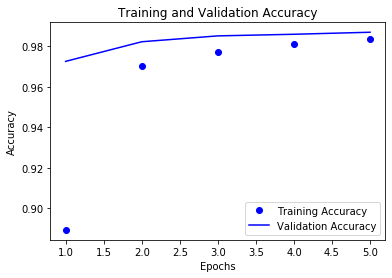

In [38]:
create_val_plot(model_history=history_dict, plot_type='accuracy')

### 7.2 Training model for more epochs

Adding a Dropout layer appears to have fixed the overfitting problem, however judging by the shape of the curves the accuracy may not have reached its maximum in 5 epochs. Training for 10 epochs may improve the accuracy on the validation set above 0.9870.

In [39]:
model_history = model.fit(x_train_partial, y_train_partial, epochs=10, batch_size=64, validation_data=(x_val,y_val))

Epoch 1/10
500/500 [==============================] - 18s 35ms/step - loss: 0.0444 - accuracy: 0.9858 - val_loss: 0.0361 - val_accuracy: 0.9893
Epoch 2/10
500/500 [==============================] - 18s 36ms/step - loss: 0.0401 - accuracy: 0.9869 - val_loss: 0.0350 - val_accuracy: 0.9884
Epoch 3/10
500/500 [==============================] - 18s 35ms/step - loss: 0.0377 - accuracy: 0.9877 - val_loss: 0.0352 - val_accuracy: 0.9882
Epoch 4/10
500/500 [==============================] - 18s 35ms/step - loss: 0.0356 - accuracy: 0.9889 - val_loss: 0.0298 - val_accuracy: 0.9904
Epoch 5/10
500/500 [==============================] - 18s 35ms/step - loss: 0.0285 - accuracy: 0.9908 - val_loss: 0.0385 - val_accuracy: 0.9891
Epoch 6/10
500/500 [==============================] - 18s 35ms/step - loss: 0.0279 - accuracy: 0.9907 - val_loss: 0.0363 - val_accuracy: 0.9891
Epoch 7/10
500/500 [==============================] - 17s 35ms/step - loss: 0.0246 - accuracy: 0.9916 - val_loss: 0.0321 - val_accuracy:

In [40]:
history_dict = model_history.history

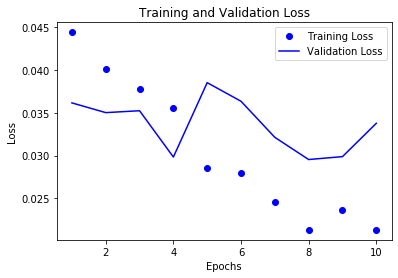

In [41]:
create_val_plot(model_history=history_dict, plot_type='loss')

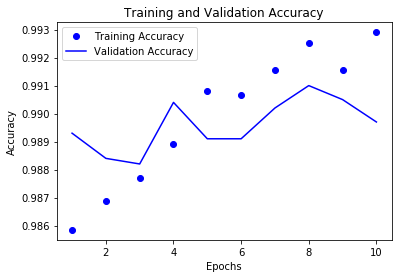

In [42]:
create_val_plot(model_history=history_dict, plot_type='accuracy')

Training for 10 epochs has increased the validation set accuracy from 0.9870 to 0.9897, however there appears to be more fluctuations in the validation set accuracy.

### 7.3 Adding more Dropout layers

Two more Dropout layers are added after the max pooling layers:

In [43]:
# New model with Dropout added before Dense layers and after MaxPooling2D layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [44]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [45]:
model_history = model.fit(x_train_partial, y_train_partial, epochs=10, batch_size=64, validation_data=(x_val,y_val))

Epoch 1/10
500/500 [==============================] - 22s 45ms/step - loss: 0.6004 - accuracy: 0.7974 - val_loss: 0.1322 - val_accuracy: 0.9575
Epoch 2/10
500/500 [==============================] - 22s 45ms/step - loss: 0.1862 - accuracy: 0.9415 - val_loss: 0.0796 - val_accuracy: 0.9750
Epoch 3/10
500/500 [==============================] - 22s 43ms/step - loss: 0.1397 - accuracy: 0.9561 - val_loss: 0.0637 - val_accuracy: 0.9795
Epoch 4/10
500/500 [==============================] - 23s 46ms/step - loss: 0.1194 - accuracy: 0.9631 - val_loss: 0.0510 - val_accuracy: 0.9837
Epoch 5/10
500/500 [==============================] - 23s 45ms/step - loss: 0.1047 - accuracy: 0.9663 - val_loss: 0.0441 - val_accuracy: 0.9862
Epoch 6/10
500/500 [==============================] - 23s 45ms/step - loss: 0.0960 - accuracy: 0.9699 - val_loss: 0.0475 - val_accuracy: 0.9844
Epoch 7/10
500/500 [==============================] - 21s 43ms/step - loss: 0.0900 - accuracy: 0.9722 - val_loss: 0.0390 - val_accuracy:

In [46]:
history_dict = model_history.history

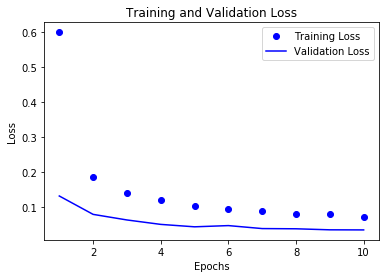

In [47]:
create_val_plot(model_history=history_dict, plot_type='loss')

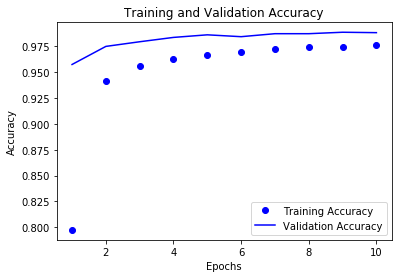

In [48]:
create_val_plot(model_history=history_dict, plot_type='accuracy')

Additional dropout layers have reduced the variance in the validation set accuracy, however the accuracy has dropped slightly from 0.9897 to 0.9883.

### 7.4 Final model configuration

To attempt reaching the same level of validation set accuracy as with the model in Section 7.2, the number of units in the first Dense layer (final hidden layer) will be doubled to increase the number of model parameters capable of modelling the problem. In addition, the dropout layers after the max pooling layers have had their rate decreased from 0.5 to 0.25, and another dropout layer has been added before the output layer.

In [49]:
# New model with Dropout added before Dense layers, after MaxPooling2D layers
# and double the number of units in the Dense hidden layer

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [50]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [51]:
model_history = model.fit(x_train_partial, y_train_partial, epochs=10, batch_size=64, validation_data=(x_val,y_val))

Epoch 1/10
500/500 [==============================] - 23s 46ms/step - loss: 0.5114 - accuracy: 0.8308 - val_loss: 0.0993 - val_accuracy: 0.9691
Epoch 2/10
500/500 [==============================] - 23s 45ms/step - loss: 0.1453 - accuracy: 0.9544 - val_loss: 0.0599 - val_accuracy: 0.9802
Epoch 3/10
500/500 [==============================] - 23s 46ms/step - loss: 0.1050 - accuracy: 0.9681 - val_loss: 0.0490 - val_accuracy: 0.9838
Epoch 4/10
500/500 [==============================] - 25s 51ms/step - loss: 0.0899 - accuracy: 0.9713 - val_loss: 0.0395 - val_accuracy: 0.9874
Epoch 5/10
500/500 [==============================] - 26s 52ms/step - loss: 0.0765 - accuracy: 0.9759 - val_loss: 0.0380 - val_accuracy: 0.9872
Epoch 6/10
500/500 [==============================] - 24s 48ms/step - loss: 0.0724 - accuracy: 0.9778 - val_loss: 0.0394 - val_accuracy: 0.9878
Epoch 7/10
500/500 [==============================] - 24s 47ms/step - loss: 0.0652 - accuracy: 0.9798 - val_loss: 0.0341 - val_accuracy:

In [52]:
history_dict = model_history.history

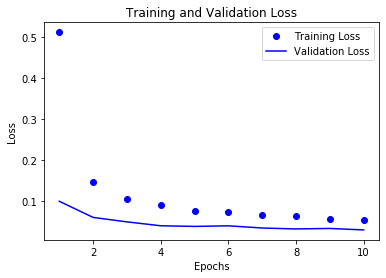

In [53]:
create_val_plot(model_history=history_dict, plot_type='loss')

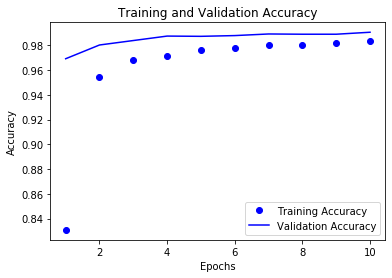

In [54]:
create_val_plot(model_history=history_dict, plot_type='accuracy')

By making the changes noted above, this iteration of the model appears to have been trained long enough to get high accuracy while not overfitting.

### 7.5 Training final model configuration and generating predictions

The final model configuration from Section 7.4 is retrained using the original training dataset for 10 epochs, and then predictions and a submission file are generated using the same procedure as before.

In [55]:
model_history = model.fit(x_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
657/657 [==============================] - 30s 45ms/step - loss: 0.0579 - accuracy: 0.9815
Epoch 2/10
657/657 [==============================] - 30s 45ms/step - loss: 0.0538 - accuracy: 0.9825
Epoch 3/10
657/657 [==============================] - 29s 44ms/step - loss: 0.0495 - accuracy: 0.9845
Epoch 4/10
657/657 [==============================] - 29s 44ms/step - loss: 0.0481 - accuracy: 0.9846
Epoch 5/10
657/657 [==============================] - 29s 45ms/step - loss: 0.0461 - accuracy: 0.9860
Epoch 6/10
657/657 [==============================] - 30s 46ms/step - loss: 0.0436 - accuracy: 0.9863
Epoch 7/10
657/657 [==============================] - 32s 49ms/step - loss: 0.0444 - accuracy: 0.9865
Epoch 8/10
657/657 [==============================] - 30s 46ms/step - loss: 0.0440 - accuracy: 0.9864
Epoch 9/10
657/657 [==============================] - 29s 44ms/step - loss: 0.0403 - accuracy: 0.9872
Epoch 10/10
657/657 [==============================] - 34s 52ms/step - loss: 0.040

In [56]:
predictions = model.predict(x_test)

predictions_converted = np.zeros((predictions.shape[0], 2))

for i in range(0, len(predictions)):
    predictions_converted[i][0] = i+1
    predictions_converted[i][1] = predictions[i].argmax()

predictions_converted = predictions_converted.astype('int')

submission_df = pd.DataFrame(data=predictions_converted, columns=['ImageId', 'Label'])
submission_df.apply(pd.to_numeric)

submission_df.to_csv('submission2.csv', index=False)

After submitting the file to Kaggle for evaluation, the accuracy score of the final CNN model is 0.99228, or 99.228%, compared to the baseline model's accuracy of 98.614%. Creating a validation set to test different model configurations has resulted in an accuracy increase of 0.614%, and a 44% relative decrease in the error rate**.

** Error rate calculation:
- Assume basis of 100 samples
- Number of errors from baseline model: 100 - 98.614 = 1.386
- Number of errors from final model: 100 - 99.228 = 0.772
- Relative difference: (0.772 - 1.386) / 1.386 * 100 = -44.300%

## 8. Conclusion

A Convolutional Neural Network (CNN) has been developed to classify images of handwritten digits ranging from 0 to 9. The network architecture consists of a convolutional input layer, followed by three hidden layers (two convolutional and one densely connected) and finally a densely connected output layer. After testing, it was determined that the best performing model was trained for 10 epochs and utilized dropout after each layer. Upon submitting the classification predictions of the model to Kaggle for evaluation, the accuracy of the CNN is 99.228%.